In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import shutil, os
%matplotlib inline
is_cuda=False
if torch.cuda.is_available():
    is_cuda = True
print(is_cuda)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("using {} device".format(device))

False
using cpu device


In [12]:
print(os.getcwd())

C:\Users\User\Deep Learning


# Directory

In [13]:
original_dataset_dir = '/Users/User/Deep Learning/train/train'
base_dir = '/Users/User/Deep Learning/catsdogs'
##os.mkdir(base_dir)

In [14]:
train_dir = os.path.join(base_dir, 'train')
##os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
##os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
##os.mkdir(test_dir)

In [15]:
# train dir
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
##os.mkdir(train_cats_dir)
##os.mkdir(train_dogs_dir)

# valid dir
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
##os.mkdir(validation_cats_dir)
##os.mkdir(validation_dogs_dir)

# test dir
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
##os.mkdir(test_cats_dir)
##os.mkdir(test_dogs_dir)

# Dataset

In [16]:
# cats 0~999
fnames = ['cat.{}.jpg'.format(i) for i in range (1000)]

In [17]:
for fnames in fnames:
    src = os.path.join(original_dataset_dir, fnames)
    dst = os.path.join(train_cats_dir, fnames)
    shutil.copyfile(src,dst)

In [18]:
# dogs 0~999
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fnames in fnames:
    src = os.path.join(original_dataset_dir, fnames)
    dst = os.path.join(train_dogs_dir, fnames)
    shutil.copyfile(src,dst)

In [19]:
# valid dset
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fnames in fnames:
    src = os.path.join(original_dataset_dir, fnames)
    dst = os.path.join(validation_cats_dir, fnames)
    shutil.copyfile(src,dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fnames in fnames:
    src = os.path.join(original_dataset_dir, fnames)
    dst = os.path.join(validation_dogs_dir, fnames)
    shutil.copyfile(src,dst)

In [20]:
# test dset
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fnames in fnames:
    src = os.path.join(original_dataset_dir, fnames)
    dst = os.path.join(test_cats_dir, fnames)
    shutil.copyfile(src,dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fnames in fnames:
    src = os.path.join(original_dataset_dir, fnames)
    dst = os.path.join(test_dogs_dir, fnames)
    shutil.copyfile(src,dst)

In [21]:
print('훈련용 고양이 이미지 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 개수: 1000
훈련용 강아지 이미지 개수: 1000
검증용 고양이 이미지 개수: 500
검증용 강아지 이미지 개수: 500
테스트용 고양이 이미지 개수: 500
테스트용 강아지 이미지 개수: 500


# Data pre-processing

In [75]:
transformation = transforms.Compose([
    transforms.Resize([150,150]),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train_data = datasets.ImageFolder(train_dir, transform = transformation)
validation_data = datasets.ImageFolder(validation_dir, transform = transformation)
train_loader = torch.utils.data.DataLoader(train_data,batch_size=20,shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data,batch_size=20,shuffle=True)

In [76]:
len(train_loader)

100

In [77]:
len(train_loader.dataset)

2000

In [78]:
train_loader.dataset[0][0].shape

torch.Size([3, 150, 150])

In [127]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.shape)
print(images[0])

torch.Size([20, 3, 150, 150])


torch.Size([150, 150])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


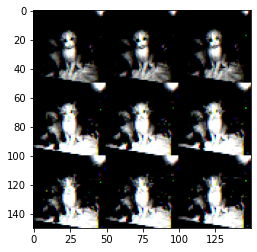

In [138]:
digit = images[2]
digit = digit.view()
plt.imshow(digit)
plt.show()

# Model

In [100]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size = 3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size = 3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64,128, kernel_size =  3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 128, kernel_size = 3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(7*7*128,512),
            nn.ReLU(),
            nn.Linear(512,1),
            nn.Sigmoid()
        )
    def forward(self,x):
        x = self.main(x)
        return x

In [101]:
model = Net()
if is_cuda:
    model.cuda()
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [102]:
print(model)

Net(
  (main): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=6272, out_features=512, bias=True)
    (14): ReLU()
    (15): Linear(in_features=512, out_features=1, bias=True)
    (16): Sigmoid()
  )
)


# Define Train & Inference 

In [135]:
# Training
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # forward
        pred = model(X)
        loss = loss_fn(pred,y)
        
        # backward 
        optimizer.zero_grad()
        loss.backward()
        
        # update weights
        optimizer.step()
        
        if batch %100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f"loss: {loss:>7f}[{current:>5d}/{size:5d}]")

In [136]:
# Testing
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():           # data 추적 X (inference)
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred,y).item()
            correct += (pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# Train

In [137]:
epochs = 30
for t in range(epochs):
    print(f"Epochs {t+1} \n")
    train(train_loader, model, loss_fn, optimizer)
    test(validation_loader, model, loss_fn)
print("Done!")

Epochs 1 



RuntimeError: Found dtype Long but expected Float